In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
from scipy.stats import skew
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df = pd.read_csv('Customer Conversion Prediction.csv')

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# Renaming columns to improve readability

In [6]:
df.rename(columns = {
    'dur':'duration',
    'mon': 'month',
    'y' : 'subscribed'
}, inplace = True)

In [7]:
df.head()

,age,job,marital,education_qual,call_type,day,month,duration,num_calls,prev_outcome,subscribed
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## checking for null values

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
month             0
duration          0
num_calls         0
prev_outcome      0
subscribed        0
dtype: int64

## Checking for duplicates 

In [9]:
duplicate_rows = df.duplicated()
df[duplicate_rows]

,age,job,marital,education_qual,call_type,day,month,duration,num_calls,prev_outcome,subscribed
6893,34,services,married,secondary,unknown,28,may,124,1,unknown,no
8138,29,admin.,single,secondary,unknown,2,jun,121,4,unknown,no
11630,39,blue-collar,married,primary,unknown,19,jun,112,4,unknown,no
13400,36,blue-collar,married,secondary,cellular,9,jul,183,1,unknown,no
19826,36,management,married,tertiary,cellular,8,aug,75,2,unknown,no
19854,32,technician,single,tertiary,cellular,8,aug,31,2,unknown,no


In [10]:
# Removing duplicates
df.drop_duplicates(inplace=True)

# Checking Data types

In [11]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
month             object
duration           int64
num_calls          int64
prev_outcome      object
subscribed        object
dtype: object

# Dropping less important columns and creating a new dataframe

In [12]:
df1=df.drop(['day', 'month'], axis=1)
df1.head()

,age,job,marital,education_qual,call_type,duration,num_calls,prev_outcome,subscribed
0,58,management,married,tertiary,unknown,261,1,unknown,no
1,44,technician,single,secondary,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,92,1,unknown,no
4,33,unknown,single,unknown,unknown,198,1,unknown,no


In [13]:
df1.describe()

,age,duration,num_calls
count,45205.000000,45205.000000,45205.000000
mean,40.937087,258.183055,2.763898
std,10.619130,257.538504,3.098189
min,18.000000,0.000000,1.000000
25%,33.000000,103.000000,1.000000
50%,39.000000,180.000000,2.000000
75%,48.000000,319.000000,3.000000
max,95.000000,4918.000000,63.000000


# Analysing duration column

In [14]:
df1['duration'].describe()

count    45205.000000
mean       258.183055
std        257.538504
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

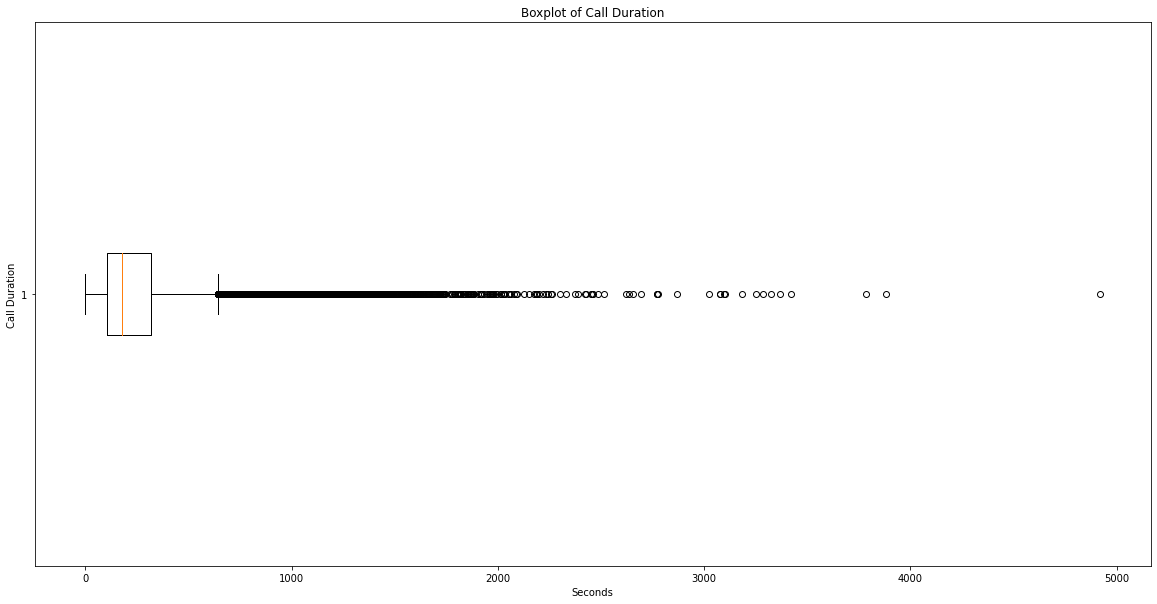

In [15]:
# Create horizontal boxplot of call "duration" column
plt.boxplot(df['duration'], vert=False)

# Add title and axis labels
plt.title('Boxplot of Call Duration')
plt.xlabel('Seconds')
plt.ylabel('Call Duration')

# Display plot
plt.show()

## we are removing the outlier above the 97th percentile because rest of the data are very close and more in number and removing all the outliers would result in losing too much data

In [16]:
def remove_duration_outliers(df):
    Q1 = df['duration'].quantile(0.25)
    Q3 = df['duration'].quantile(0.97) #using 97 percentile as there are lots of data 
    IQR = Q3 - Q1

    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    df = df[(df['duration'] > lower_range) & (df['duration'] < upper_range)]
    return df
df1= remove_duration_outliers(df1)

In [17]:
df1['duration'].describe()


count    45161.000000
mean       255.766724
std        245.116381
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       2129.000000
Name: duration, dtype: float64

## After removing outliers from "duration" column

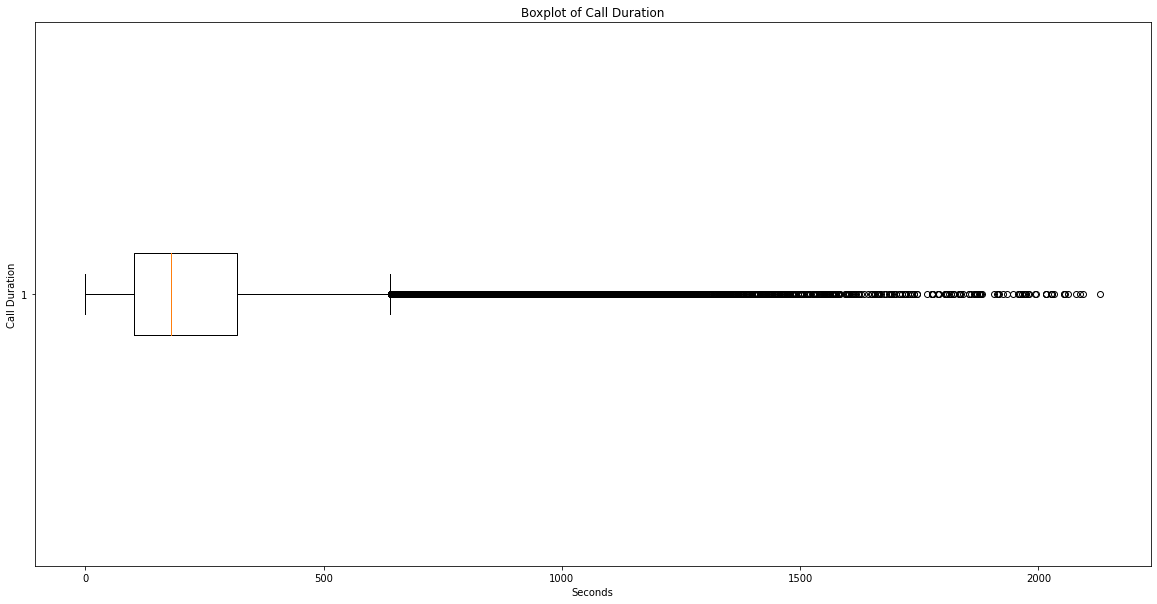

In [18]:
# Create horizontal boxplot of Call_Duration column
plt.boxplot(df1['duration'], vert=False)

# Add title and axis labels
plt.title('Boxplot of Call Duration')
plt.xlabel('Seconds')
plt.ylabel('Call Duration')

# Display plot
plt.show()

# Analysing num_calls column 

In [19]:
df1['num_calls'].describe()

count    45161.000000
mean         2.764310
std          3.099292
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

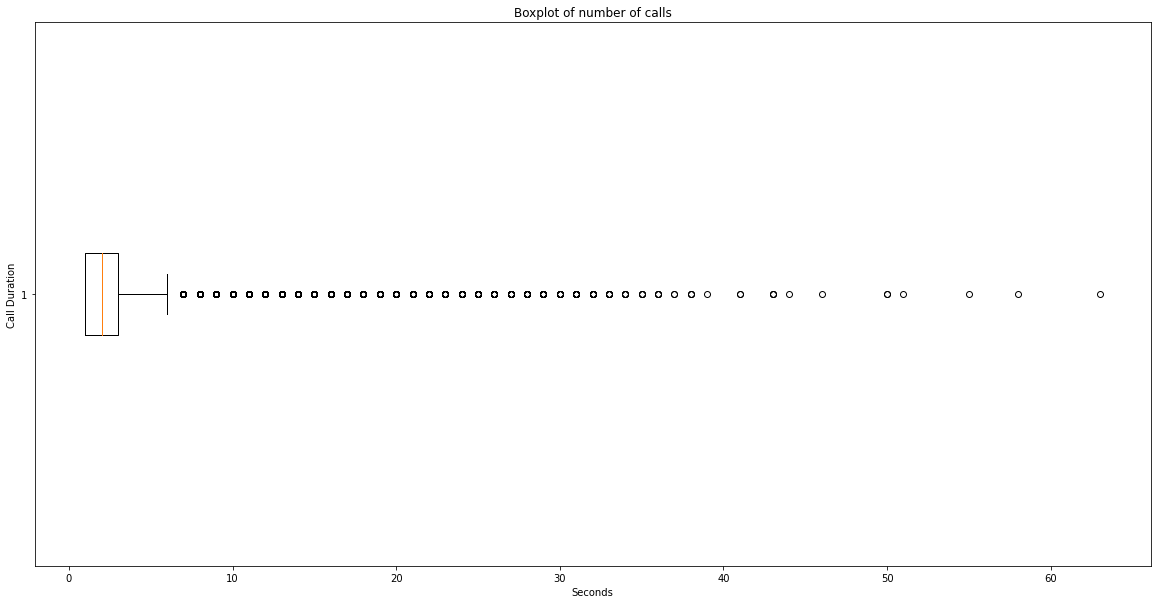

In [20]:
# Create horizontal boxplot of num_calls column
plt.boxplot(df1['num_calls'], vert=False)

# Add title and axis labels
plt.title('Boxplot of number of calls')
plt.xlabel('Seconds')
plt.ylabel('Call Duration')

# Display plot
plt.show()

## Removing the outlier above 95th percentile
### Explanation: We are removing data points where the number of calls made during the campaign is above the 95th percentile. This is based on the assumption that these values are significantly higher than the rest of the data and may not be representative of the majority of the population. By using the 95th percentile as the threshold, we are retaining the majority of the legitimate data while reducing the impact of extreme values on the analysis. 

In [21]:
def remove_num_calls_outliers(df):
    Q1 = df['num_calls'].quantile(0.25)
    Q3 = df['num_calls'].quantile(0.95)
    IQR = Q3 - Q1

    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)

    df = df[(df['num_calls'] > lower_range) & (df['num_calls'] < upper_range)]
    return df
df1= remove_num_calls_outliers(df1)

## After removing outliers from the "num_calls" column

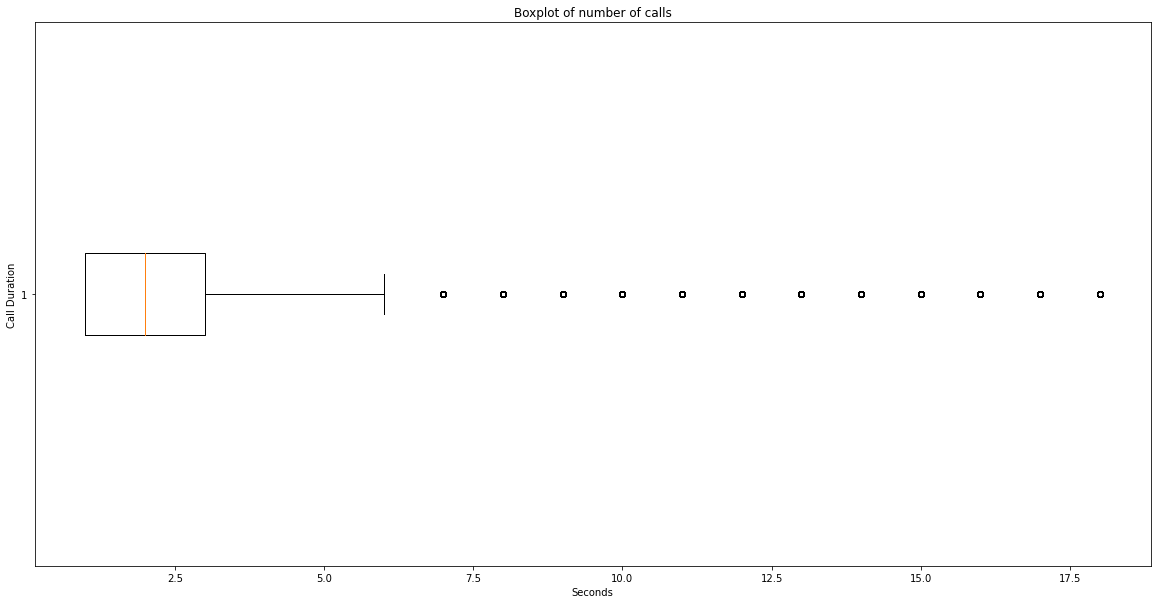

In [22]:
# Create horizontal boxplot of Call_Duration column
plt.boxplot(df1['num_calls'], vert=False)

# Add title and axis labels
plt.title('Boxplot of number of calls')
plt.xlabel('Seconds')
plt.ylabel('Call Duration')

# Display plot
plt.show()

# Analysing age column

In [23]:
df1['age'].describe()

count    44830.000000
mean        40.943408
std         10.628379
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

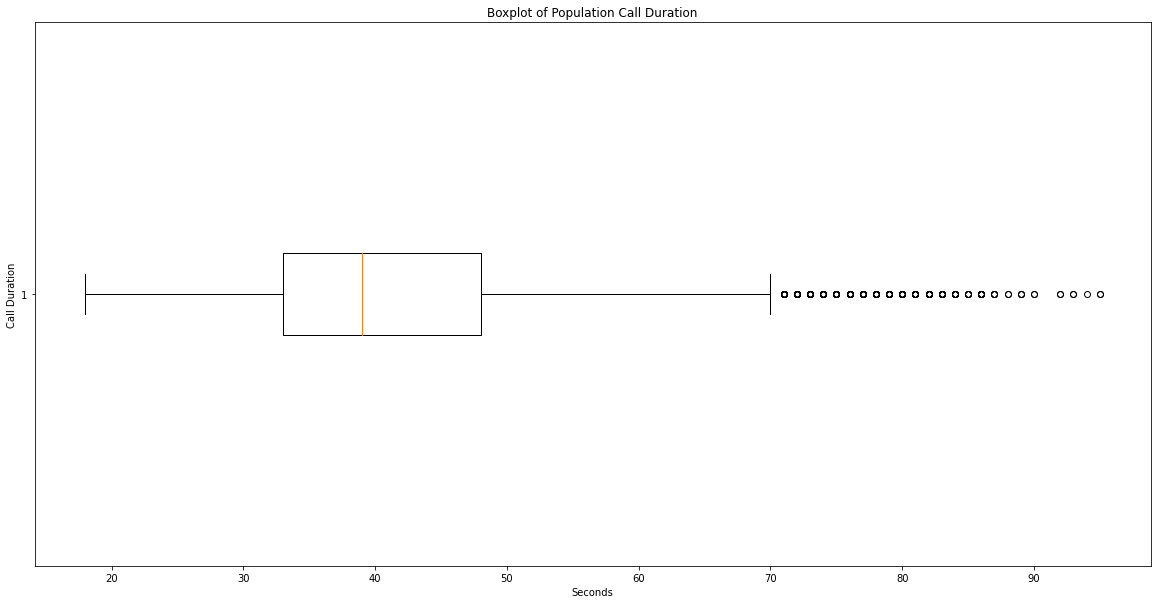

In [24]:
# Create horizontal boxplot of num_calls column
plt.boxplot(df1['age'], vert=False)

# Add title and axis labels
plt.title('Boxplot of Population Call Duration')
plt.xlabel('Seconds')
plt.ylabel('Call Duration')

# Display plot
plt.show()

# We are not removing any outliers from the "age" column as values up to 95 years of age reasonable and acceptable

In [25]:
df1.head()

,age,job,marital,education_qual,call_type,duration,num_calls,prev_outcome,subscribed
0,58,management,married,tertiary,unknown,261,1,unknown,no
1,44,technician,single,secondary,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,92,1,unknown,no
4,33,unknown,single,unknown,unknown,198,1,unknown,no


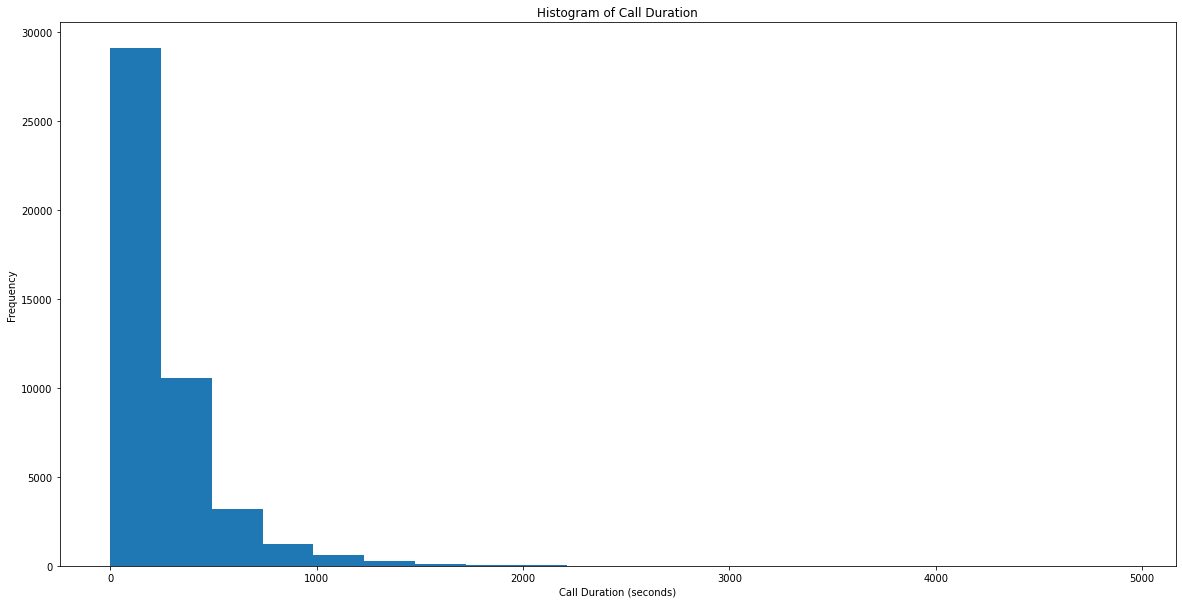

In [26]:
# Create a histogram of the "duration" column
plt.hist(df['duration'], bins=20)

# Set the plot title and axis labels
plt.title('Histogram of Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [27]:
# Calculate the skewness of the "duration" column
duration_skewness = skew(df1['duration'])

'Skewness of Duration column:', duration_skewness

('Skewness of Duration column:', 2.4959889173148215)

In [28]:
def univ_cont(col):

    df_univ_cont = pd.DataFrame(col.describe(percentiles = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]).round(0)).transpose()
    df_univ_cont["skewness"] = col.skew()
    df_univ_cont["kurtosis"] = col.kurtosis()

    sns.distplot(col, kde = False, color = 'g')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

    sns.boxplot(y = col, showfliers = False, whis = 2)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    stat_chi, p_chi = stats.chisquare(col)
    print("Chi square test for normality")
    print(stat_chi, p_chi)
    if p_chi > 0.05:
        print("Probably Normal")
    else:
        print("Probably Not Normal")

    return df_univ_cont.round(0)

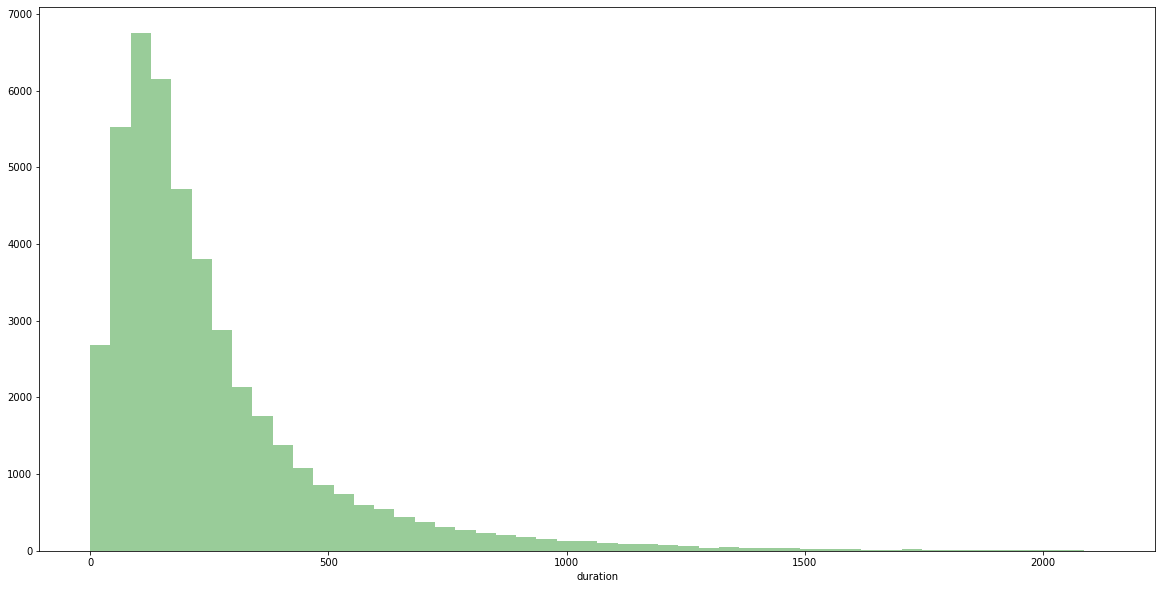

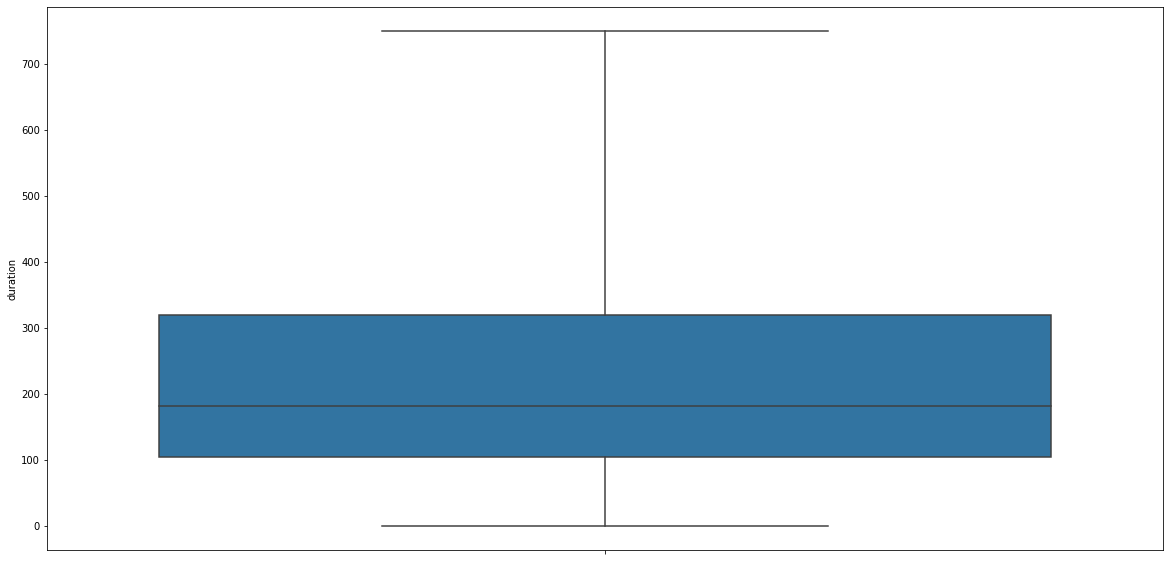

Chi square test for normality
10484820.623116491 0.0
Probably Not Normal


,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max,skewness,kurtosis
duration,44830.0,257.0,245.0,0.0,37.0,60.0,104.0,181.0,319.0,546.0,746.0,2129.0,2.0,9.0


In [29]:
univ_cont(df1['duration'])

In [30]:
df1.head()

,age,job,marital,education_qual,call_type,duration,num_calls,prev_outcome,subscribed
0,58,management,married,tertiary,unknown,261,1,unknown,no
1,44,technician,single,secondary,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,92,1,unknown,no
4,33,unknown,single,unknown,unknown,198,1,unknown,no


<Axes: xlabel='job', ylabel='count'>

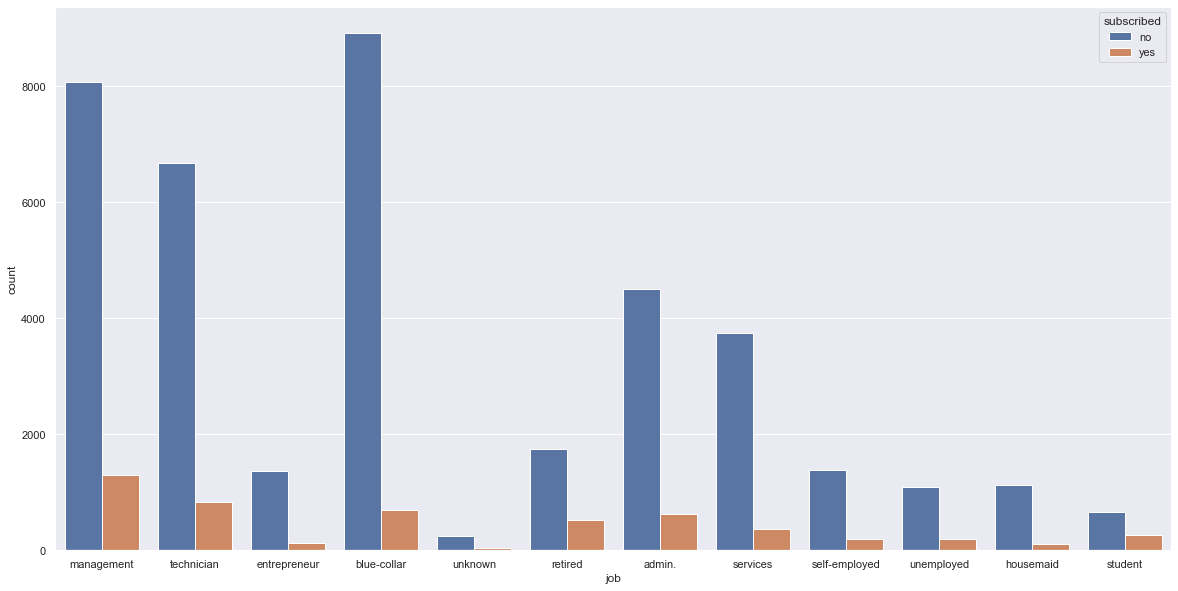

In [31]:

sns.set(style='darkgrid')
sns.countplot(x='job', hue='subscribed',data=df1)

<Axes: xlabel='marital', ylabel='count'>

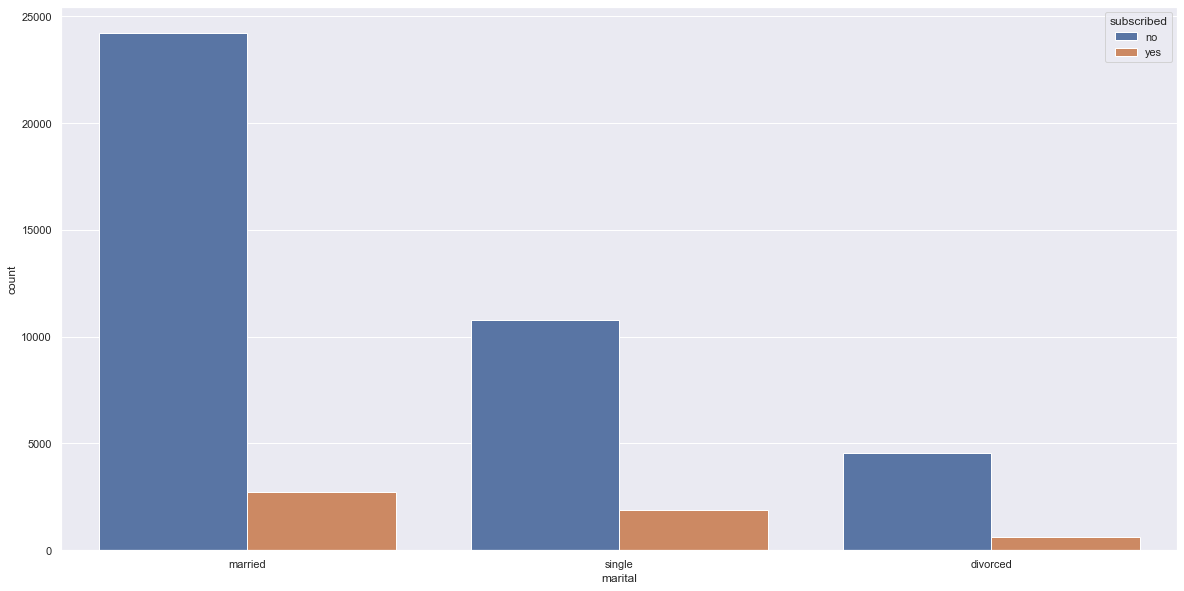

In [32]:
sns.set(style='darkgrid')
sns.countplot(x='marital', hue='subscribed',data=df1)

<Axes: xlabel='education_qual', ylabel='count'>

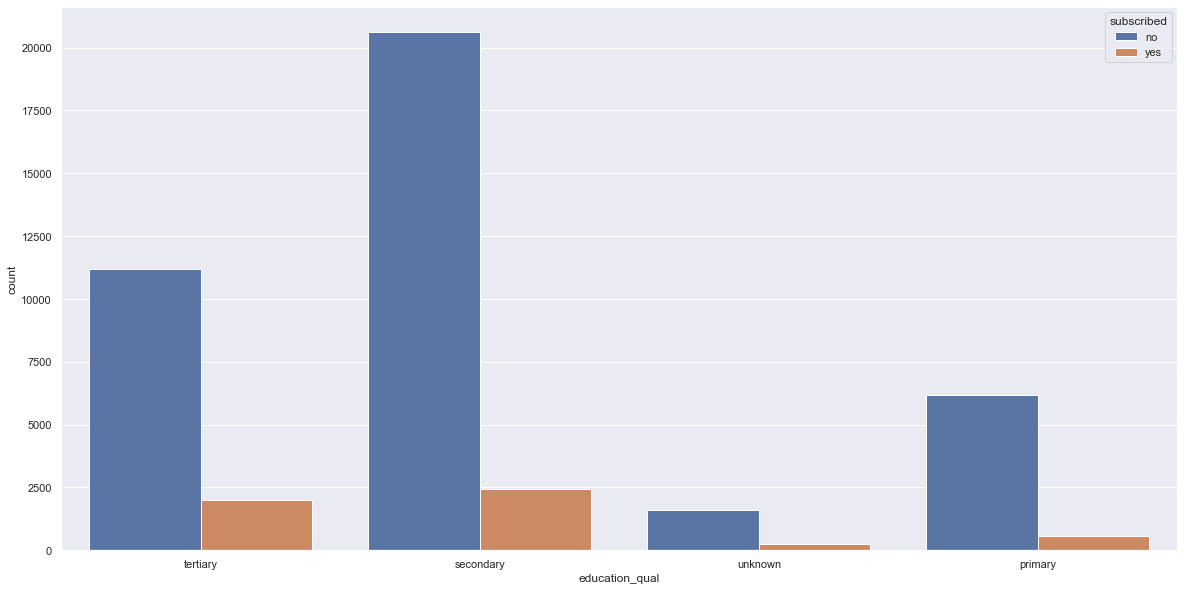

In [33]:
sns.set(style='darkgrid')


subscription_prob = df1['subscribed'].value_counts(normalize=True)
sns.countplot(x='education_qual', hue='subscribed',data=df1)


In [34]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df1['job']= label_encoder.fit_transform(df1['job'])
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['education_qual']= label_encoder.fit_transform(df1['education_qual'])
df1['call_type']= label_encoder.fit_transform(df1['call_type'])
df1['prev_outcome']= label_encoder.fit_transform(df1['prev_outcome'])
df1['subscribed']= label_encoder.fit_transform(df1['subscribed'])

In [35]:
df1.head()

,age,job,marital,education_qual,call_type,duration,num_calls,prev_outcome,subscribed
0,58,4,1,2,2,261,1,3,0
1,44,9,2,1,2,151,1,3,0
2,33,2,1,1,2,76,1,3,0
3,47,1,1,3,2,92,1,3,0
4,33,11,2,3,2,198,1,3,0


# Implementing Machine Learning Model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier


### List of four classifiers, namely K-Nearest Neighbors, Decision Tree, Random Forest, and Logistic Regression

In [37]:
classifiers = [
    KNeighborsClassifier(7),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    LogisticRegression(max_iter=1000)
]

In [38]:
# separate the output column from the input features
X = df1.drop('subscribed', axis=1)
y = df1['subscribed']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### A loop iterates over each classifier, fits it on the training data, makes predictions on the test data, and calculates the accuracy and log loss of the predictions. It then adds the results to the 'log' DataFrame

In [39]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols) 
#It creates an empty DataFrame called 'log' with columns 'Classifier', 'Accuracy', and 'Log Loss'

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print(name)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

KNeighborsClassifier
Accuracy: 88.0549%
Log Loss: 1.0878005760817775
DecisionTreeClassifier
Accuracy: 85.2777%
Log Loss: 5.307144858159679
RandomForestClassifier
Accuracy: 89.1367%
Log Loss: 0.3623372878415615
LogisticRegression
Accuracy: 88.9025%
Log Loss: 0.2816057342998237


### Ran a loop to fit four classifiers (KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression) on the training data and evaluated their performance on the test data.

### The KNeighborsClassifier achieved an accuracy of 88.05% and a log loss of 1.09. The DecisionTreeClassifier achieved an accuracy of 85.20% and a log loss of 5.34. The RandomForestClassifier achieved an accuracy of 89.28% and a log loss of 0.37. The LogisticRegression achieved an accuracy of 88.90% and a log loss of 0.28.

### Based on these results, it seems that the RandomForestClassifier performs the best among the four classifiers with the highest accuracy and lowest log loss.

In [40]:
log

,Classifier,Accuracy,Log Loss
0,KNeighborsClassifier,88.054874,1.087801
0,DecisionTreeClassifier,85.277716,5.307145
0,RandomForestClassifier,89.136739,0.362337
0,LogisticRegression,88.902521,0.281606
